In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot
import numpy
from scipy.linalg import solve_triangular
import sys
sys.path.append('../src/')
import densities

In [2]:
R, D = 1, 10
rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = pdf.GaussianPDF(Sigma=Sigma_phi, mu=mu_phi)

## Test Marginals 

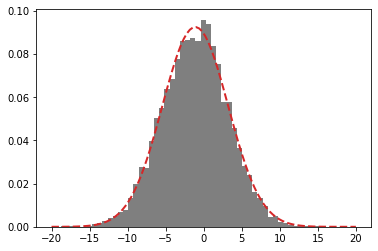

In [3]:
marginal_idx = numpy.random.randint(D, size=(1,))
#marg_phi = phi.get_marginal([0,1,2])
samples_joint = phi.sample(10000)
x_range = numpy.array([numpy.linspace(-20,20,100)]).T
phi_marg = phi.get_marginal(marginal_idx)
pyplot.hist(samples_joint[:,0,marginal_idx], bins=50, density=True, facecolor='k', alpha=.5)
pyplot.plot(x_range[:,0], phi_marg.evaluate(x_range)[0], 'C3--', lw=2)
pyplot.show()

## Test Conditionals

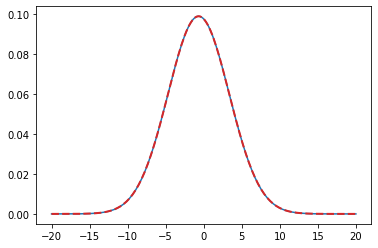

In [4]:
R, D = 1, 10
dim_indices = numpy.arange(D)
numpy.random.shuffle(dim_indices)
conditional_idx = numpy.sort(dim_indices[1:])
rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = pdf.GaussianPDF(Sigma=Sigma_phi, mu=mu_phi)
phi_cond = phi.condition_on(conditional_idx)
cond_point = numpy.random.randn(1, D-1)
phi_cond_density = phi_cond.condition_on_x(cond_point)

x_range = numpy.array([numpy.linspace(-20,20,200)]).T
x2_range = numpy.tile(x_range, (1,D))
x2_range[:,conditional_idx] = cond_point
phi_cond_num = phi.evaluate(x2_range)[0]
phi_cond_num /= numpy.sum(phi_cond_num)
phi_cond_num /= x_range[1] - x_range[0]
pyplot.plot(x_range[:,0], phi_cond_num)
pyplot.plot(x_range[:,0], phi_cond_density.evaluate(x_range)[0], 'C3--', lw=2)
pyplot.show()

## Test affine joint transformation

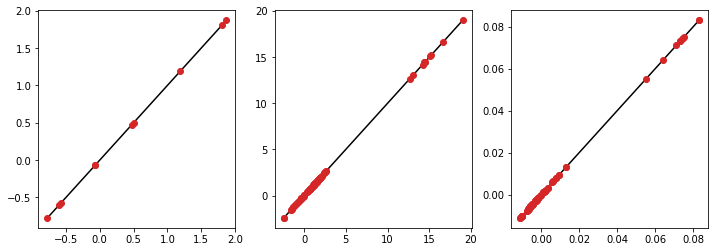

In [5]:
R, D = 1, 10
dim_indices = numpy.arange(D)
numpy.random.shuffle(dim_indices)
conditional_idx = numpy.arange(6)

rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = pdf.GaussianPDF(Sigma=Sigma_phi, mu=mu_phi)
phi_cond = phi.condition_on(conditional_idx)
phi_marg = phi.get_marginal(conditional_idx)
phi_new = phi_marg.affine_joint_transformation(phi_cond)
pyplot.figure(figsize=(12,4))
pyplot.subplot(131)
pyplot.plot([numpy.amin(phi.mu),numpy.amax(phi.mu)],[numpy.amin(phi.mu),numpy.amax(phi.mu)], 'k')
pyplot.plot(phi.mu.flatten(), phi_new.mu.flatten(), 'C3o')
pyplot.subplot(132)
pyplot.plot([numpy.amin(phi.Sigma),numpy.amax(phi.Sigma)],[numpy.amin(phi.Sigma),numpy.amax(phi.Sigma)], 'k')
pyplot.plot(phi.Sigma.flatten(), phi_new.Sigma.flatten(), 'C3o')
pyplot.subplot(133)
pyplot.plot([numpy.amin(phi.Lambda),numpy.amax(phi.Lambda)],[numpy.amin(phi.Lambda),numpy.amax(phi.Lambda)], 'k')
pyplot.plot(phi.Lambda.flatten(), phi_new.Lambda.flatten(), 'C3o')

## Test affine marginal transformation

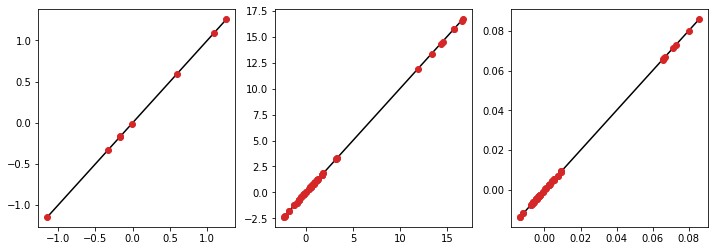

In [6]:
R, D = 1, 10
dim_indices = numpy.arange(D)
numpy.random.shuffle(dim_indices)
conditional_idx = numpy.arange(2)
other_idx = numpy.arange(2,D)

rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = pdf.GaussianPDF(Sigma=Sigma_phi, mu=mu_phi)
phi_cond = phi.condition_on(conditional_idx)
phi_marg = phi.get_marginal(conditional_idx)
phi_new = phi_marg.affine_marginal_transformation(phi_cond)
phi_marg_true = phi.get_marginal(other_idx)
pyplot.figure(figsize=(12,4))
pyplot.subplot(131)
pyplot.plot([numpy.amin(phi_marg_true.mu),numpy.amax(phi_marg_true.mu)],[numpy.amin(phi_marg_true.mu),numpy.amax(phi_marg_true.mu)], 'k')
pyplot.plot(phi_marg_true.mu.flatten(), phi_new.mu.flatten(), 'C3o')
pyplot.subplot(132)
pyplot.plot([numpy.amin(phi.Sigma),numpy.amax(phi_marg_true.Sigma)],[numpy.amin(phi_marg_true.Sigma),numpy.amax(phi_marg_true.Sigma)], 'k')
pyplot.plot(phi_marg_true.Sigma.flatten(), phi_new.Sigma.flatten(), 'C3o')
pyplot.subplot(133)
pyplot.plot([numpy.amin(phi_marg_true.Lambda),numpy.amax(phi_marg_true.Lambda)],[numpy.amin(phi_marg_true.Lambda),numpy.amax(phi_marg_true.Lambda)], 'k')
pyplot.plot(phi_marg_true.Lambda.flatten(), phi_new.Lambda.flatten(), 'C3o')

## Test affine conditional transformation 

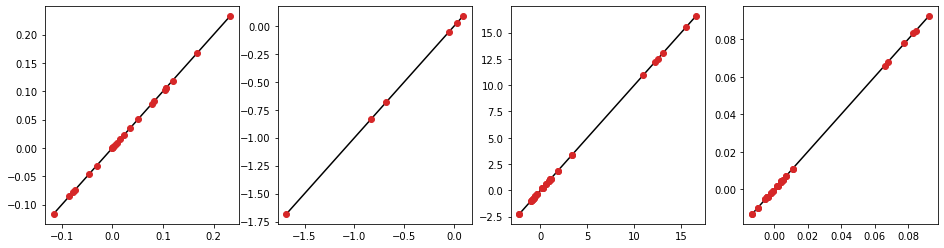

In [9]:
R, D = 1, 10
dim_indices = numpy.arange(D)
numpy.random.shuffle(dim_indices)
conditional_idx = numpy.arange(6)
other_idx = numpy.arange(6,D)

rand_nums = numpy.random.randn(D,D)
Sigma_phi = .5 * numpy.dot(rand_nums, rand_nums.T) + D * numpy.eye(D)
Sigma_phi = numpy.tile(Sigma_phi, (R, 1, 1))
mu_phi = numpy.random.randn(R, D)
phi = pdf.GaussianPDF(Sigma=Sigma_phi, mu=mu_phi)
phi_cond = phi.condition_on(conditional_idx)
phi_marg = phi.get_marginal(conditional_idx)
phi_cond_new = phi_marg.affine_conditional_transformation(phi_cond)
phi_cond_true = phi.condition_on(other_idx)
pyplot.figure(figsize=(16,4))
pyplot.subplot(141)
pyplot.plot([numpy.amin(phi_cond_true.M),numpy.amax(phi_cond_true.M)],[numpy.amin(phi_cond_true.M),numpy.amax(phi_cond_true.M)], 'k')
pyplot.plot(phi_cond_true.M.flatten(), phi_cond_new.M.flatten(), 'C3o')
pyplot.subplot(142)
pyplot.plot([numpy.amin(phi_cond_true.b),numpy.amax(phi_cond_true.b)],[numpy.amin(phi_cond_true.b),numpy.amax(phi_cond_true.b)], 'k')
pyplot.plot(phi_cond_true.b.flatten(), phi_cond_new.b.flatten(), 'C3o')
pyplot.subplot(143)
pyplot.plot([numpy.amin(phi_cond_true.Sigma),numpy.amax(phi_cond_true.Sigma)],[numpy.amin(phi_cond_true.Sigma),numpy.amax(phi_cond_true.Sigma)], 'k')
pyplot.plot(phi_cond_true.Sigma.flatten(), phi_cond_new.Sigma.flatten(), 'C3o')
pyplot.subplot(144)
pyplot.plot([numpy.amin(phi_cond_true.Lambda),numpy.amax(phi_cond_true.Lambda)],[numpy.amin(phi_cond_true.Lambda),numpy.amax(phi_cond_true.Lambda)], 'k')
pyplot.plot(phi_cond_true.Lambda.flatten(), phi_cond_new.Lambda.flatten(), 'C3o')

In [32]:
numpy.random.shuffle(numpy.arange(D))

In [8]:
cond_phi_new = marg_phi.affine_conditional_transformation(cond_phi) 

In [9]:
cond_phi_new.Dy

3

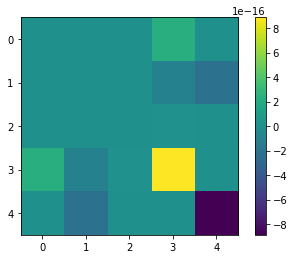

In [6]:
pyplot.imshow(phi_new.Sigma[0] - phi.Sigma[0])
pyplot.colorbar()

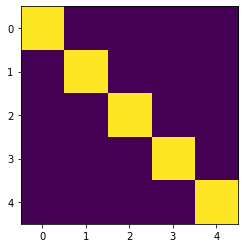

In [7]:
pyplot.imshow(numpy.dot(phi_new.Sigma[0], phi_new.Lambda[0]))

In [56]:
numpy.linalg.slogdet(phi_new.Sigma[0]), phi_new.ln_det_Sigma

((1.0, 10.528746976713832), array([10.52874698]))